In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

CHEQUEAR ERRORES


Text(0.5, 1.0, 'Barrido con bordes cerrados en modo 3')

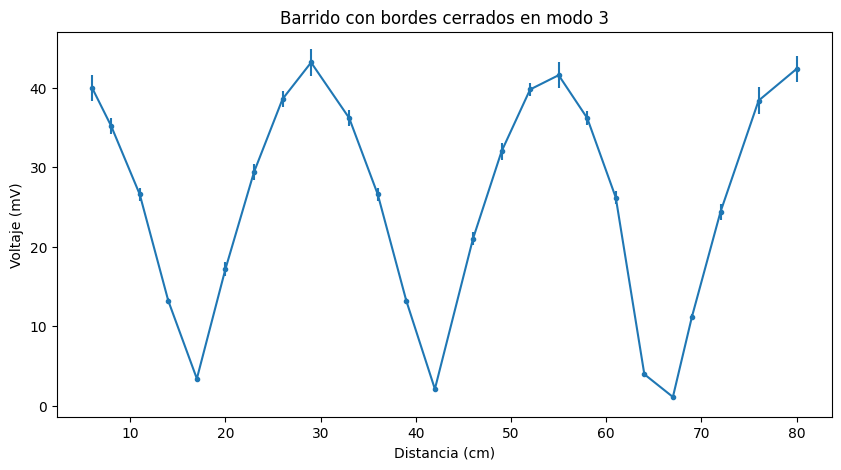

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQo8LYwaBvcfp8R0wck2HzRvU8F-fcCcibUuKCaIo-KZWAI_Dysby_7ihpNXr3uc9sdeSbn77qQdySg/pub?gid=0&single=true&output=csv"
datos = pd.read_csv(gsheet,decimal='.')
x = datos["x (cm)"].to_numpy()
A = datos["volt (Vpp)"].to_numpy()
A_err = datos['ev (Vpp)'].to_numpy() + datos['esc(V)'].to_numpy()/6

plt.figure(figsize=(10,5))
plt.errorbar(x, A, yerr=A_err, fmt='.-', label="Datos")
plt.xlabel('Distancia (cm)')
plt.ylabel('Voltaje (mV)')

plt.title('Barrido con bordes cerrados en modo 3')

In [ ]:
A_p = 42
lambd = 49.7
x_p = np.linspace(0, 80, 1000)
P = []
for i in range(len(x_p)):
  P.append(A_p * abs(np.cos(2*np.pi*x_p[i]/lambd-0.52)))

Text(0.5, 1.0, 'Barrido con bordes cerrados en modo 3')

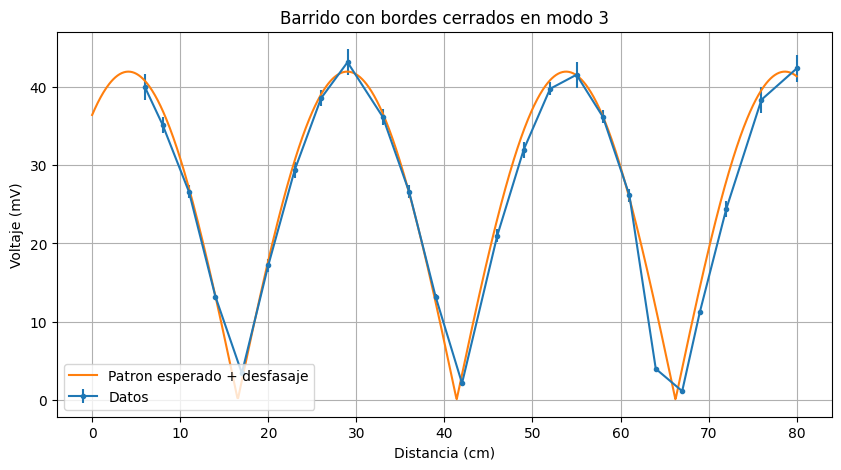

In [ ]:
plt.figure(figsize=(10,5))
plt.errorbar(x, A, yerr=A_err, fmt='.-', label="Datos")
plt.plot(x_p, P, label = 'Patron esperado + desfasaje')
plt.xlabel('Distancia (cm)')
plt.ylabel('Voltaje (mV)')
plt.grid(), plt.legend()

plt.title('Barrido con bordes cerrados en modo 3')

In [ ]:
def mod_cos(x, A, L, phi):
  return A * abs(np.cos(2*np.pi*x/(2*L/3) + phi))

(array([41.00104685, 74.84693623, -0.51225037]),
 array([0.59990907, 0.41133442, 0.03242489]))

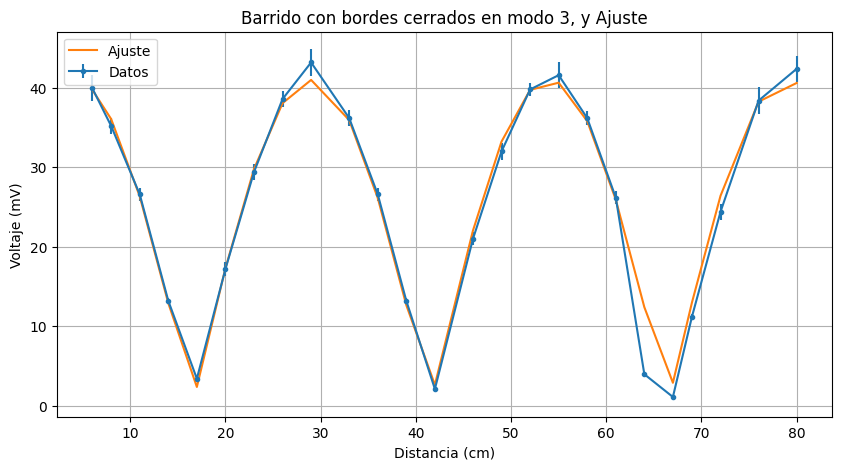

In [ ]:
params, cov = curve_fit(mod_cos, x, A, p0 = [42, 74.6, -0.5])
err = np.sqrt(np.diag(cov))
y_fit = mod_cos(x, params[0], params[1], params[2])

plt.figure(figsize=(10,5))
plt.errorbar(x, A, yerr=A_err, fmt='.-', label="Datos")
plt.plot(x, y_fit, label = 'Ajuste')
plt.xlabel('Distancia (cm)')
plt.ylabel('Voltaje (mV)')
plt.grid(), plt.legend()

plt.title('Barrido con bordes cerrados en modo 3, y Ajuste')
params, err

(array([41.00104685, 74.84693623, -0.51225037]),
 array([0.59990907, 0.41133442, 0.03242489]))

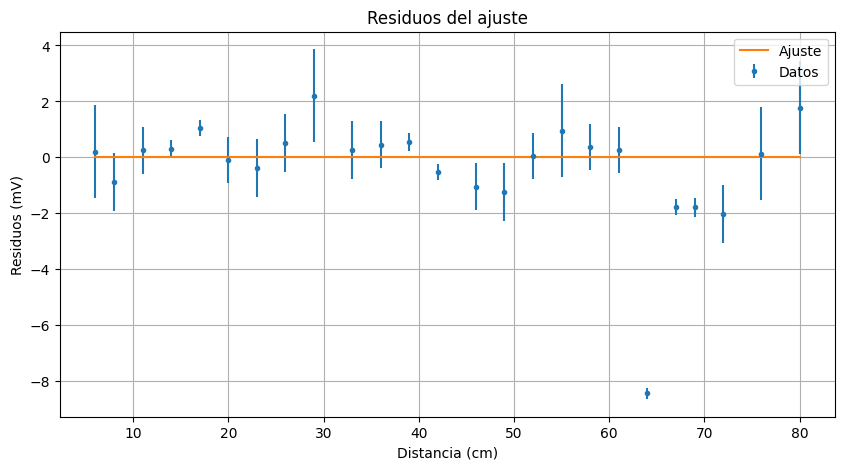

In [ ]:
plt.figure(figsize=(10,5))
plt.errorbar(x, A - y_fit, yerr=A_err, fmt='.', label="Datos")
plt.plot(x, y_fit-y_fit, label = 'Ajuste')
plt.xlabel('Distancia (cm)')
plt.ylabel('Residuos (mV)')
plt.grid(), plt.legend()

plt.title('Residuos del ajuste')
params, err